In [408]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('sci.mplstyle')


In [409]:
add = [["sigma", 10],
         ["n", 10],
         ["kappa", 10],
         ["alpha", 10]
         ]
print("sigma" in np.array(add).flatten())

True


In [410]:
c = 299792458 # m/s
hbar = 6.582119569e-16 # eV.s

def f_sigma(omega, eps_2):
    return omega * eps_2

def f_refractive_index(eps_1, eps_2):
    return [np.sqrt(0.5 * (x + np.sqrt(eps_1 ** 2 + eps_2 ** 2))) for x in [eps_1, -eps_1]]

def f_alpha(omega, kappa):
    return 2 * kappa * omega / c

                       # lcf is the lattice correction factor which multiplies into epsilon
def main(name, prefix, lcf = 1, add = [], use_average = False, savefig = False):
                                # Add in "sigma", "n", "kappa", "alpha" as needed
                                # together with their offsets in powers of 10 as 
                                # an array, e.g.
                                #   add = [["sigma", 10], ["n", "8"]]
    
    filename = ["../qe_calculations/epsilon.x_calc/" + f"eps{x}_{prefix}.dat" for x in ["r", "i"]]
    
    dat_re = np.loadtxt(filename[0], unpack = True)
    dat_im = np.loadtxt(filename[1], unpack = True)

    omega = dat_re[0]

    eps_1 = lcf * dat_re[1 :]
    eps_2 = lcf * dat_im[1 :]

    if use_average:
        eps_1 = np.mean(eps_1, axis = 0)
        eps_2 = np.mean(eps_2, axis = 0)
    
    sigma, n, kappa, alpha = [0, 0, 0, 0] # Enables dictionary below

    if len(add) != 0:
        checklist = np.array(add).flatten()
        if "sigma" in checklist:
            sigma = f_sigma(omega, eps_2)

        if "alpha" in checklist:
            n, kappa = f_refractive_index(eps_1, eps_2)
            alpha = f_alpha(omega, kappa)
        else:
            if ("n" in checklist) or ("kappa" in checklist):
                n, kappa = f_refractive_index(eps_1, eps_2)

    index_arr = ["xx", "yy", "zz"]
    if use_average:
        index_arr = [r"\mathrm{average}"]

    nrows = 1 if use_average else 3
    ncols = 1 + len(add)

    fig, ax = plt.subplots(nrows, ncols, figsize = (7 * ncols, 5 * nrows))

    # PADDING to enable indexing.
    if nrows == 1:
        ax = [ax]
    if ncols == 1:
        for i in range(nrows):
            ax[i] = [ax[i]]
    if use_average:
        eps_1 = [eps_1]
        eps_2 = [eps_2]
        sigma = [sigma]
        n = [n]
        kappa = [kappa]
        alpha = [alpha]


    color_cycle = ["c", "y", "m", "k"]

    quantity_dict = {
        "sigma" : sigma,
        "n"     : n,
        "kappa" : kappa,
        "alpha" : alpha
    }

    unit_dict = {
        "sigma" : r"\ S/m",
        "n"     : r"",
        "kappa" : r"",
        "alpha" : r"\ m^{-1}"
    }

    omega_min = np.min(omega) * 1.05
    omega_max = np.max(omega) * 1.05

    for i in range(nrows):
        
        for j in range(ncols):
            ax[i][j].set_xlabel(r"$\mathrm{Photon\ Energy}\ (eV)$")
            ax[i][j].set_xlim(omega_min, omega_max)
        
        ###############

        p = ax[i][0]
        p.plot(omega, eps_1[i], color = "b", lw = 1.5)
                
        p.set_ylabel(r"$\mathrm{Re}\left(\varepsilon_{%s}\right)$" 
                       %index_arr[i], color = 'b')
        p.set_ylim(np.min(eps_1[i]) * 1.05, np.max(eps_1[i]) * 1.05)
        
        p.tick_params(axis = "y", labelcolor = "b")

        ###############
        
        p = p.twinx()

        p.plot(omega, eps_2[i], color = "r", lw = 1.5, ls = "--")

        p.set_ylabel(r"$\mathrm{Im}\left(\varepsilon_{%s}\right)$" 
                       %index_arr[i], color = 'r')
        p.set_ylim(np.min(eps_2[i]) * 1.05, np.max(eps_2[i]) * 1.05)
        
        p.tick_params(axis = "y", labelcolor = "r")

        ###############

        for j in range(1, ncols):
            p = ax[i][j]
            
            key = add[j - 1][0]
            offset = add[j - 1][1]

            quantity = quantity_dict[key][i] / 10 ** offset
            unit = unit_dict[key]

            p.plot(omega, quantity, color = color_cycle[j - 1], lw = 1.5)

            if key == "n":
                key = r"mathit{n}"

            p.set_ylabel(r"$\%s_{%s}\left(\times 10^{%s}\mathrm{%s}\right)$" 
                         %(key, index_arr[i], offset, unit))

            p.set_ylim(np.min(quantity) * 1.05, np.max(quantity) * 1.05)

    plt.tight_layout()
    if savefig:
        plt.savefig(f"Optical Parameters of {name}.png", dpi = 600)
    plt.show()


### **Run the function here**

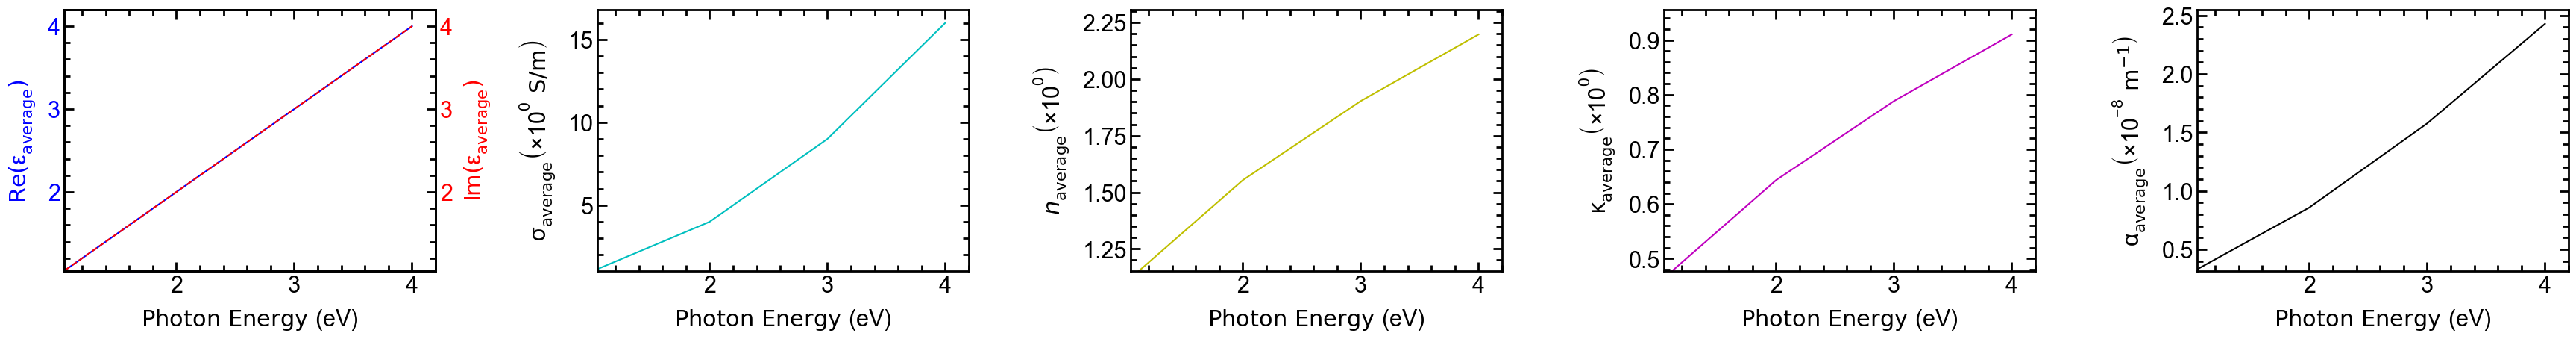

In [416]:
name = "Silicon"
prefix = "si"
latfac = 1

main(name, prefix, latfac, 
     add = [
         ["sigma", 0],
         ["n", 0],
         ["kappa", 0],
         ["alpha", -8]
         ], use_average=True, savefig = True)